INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


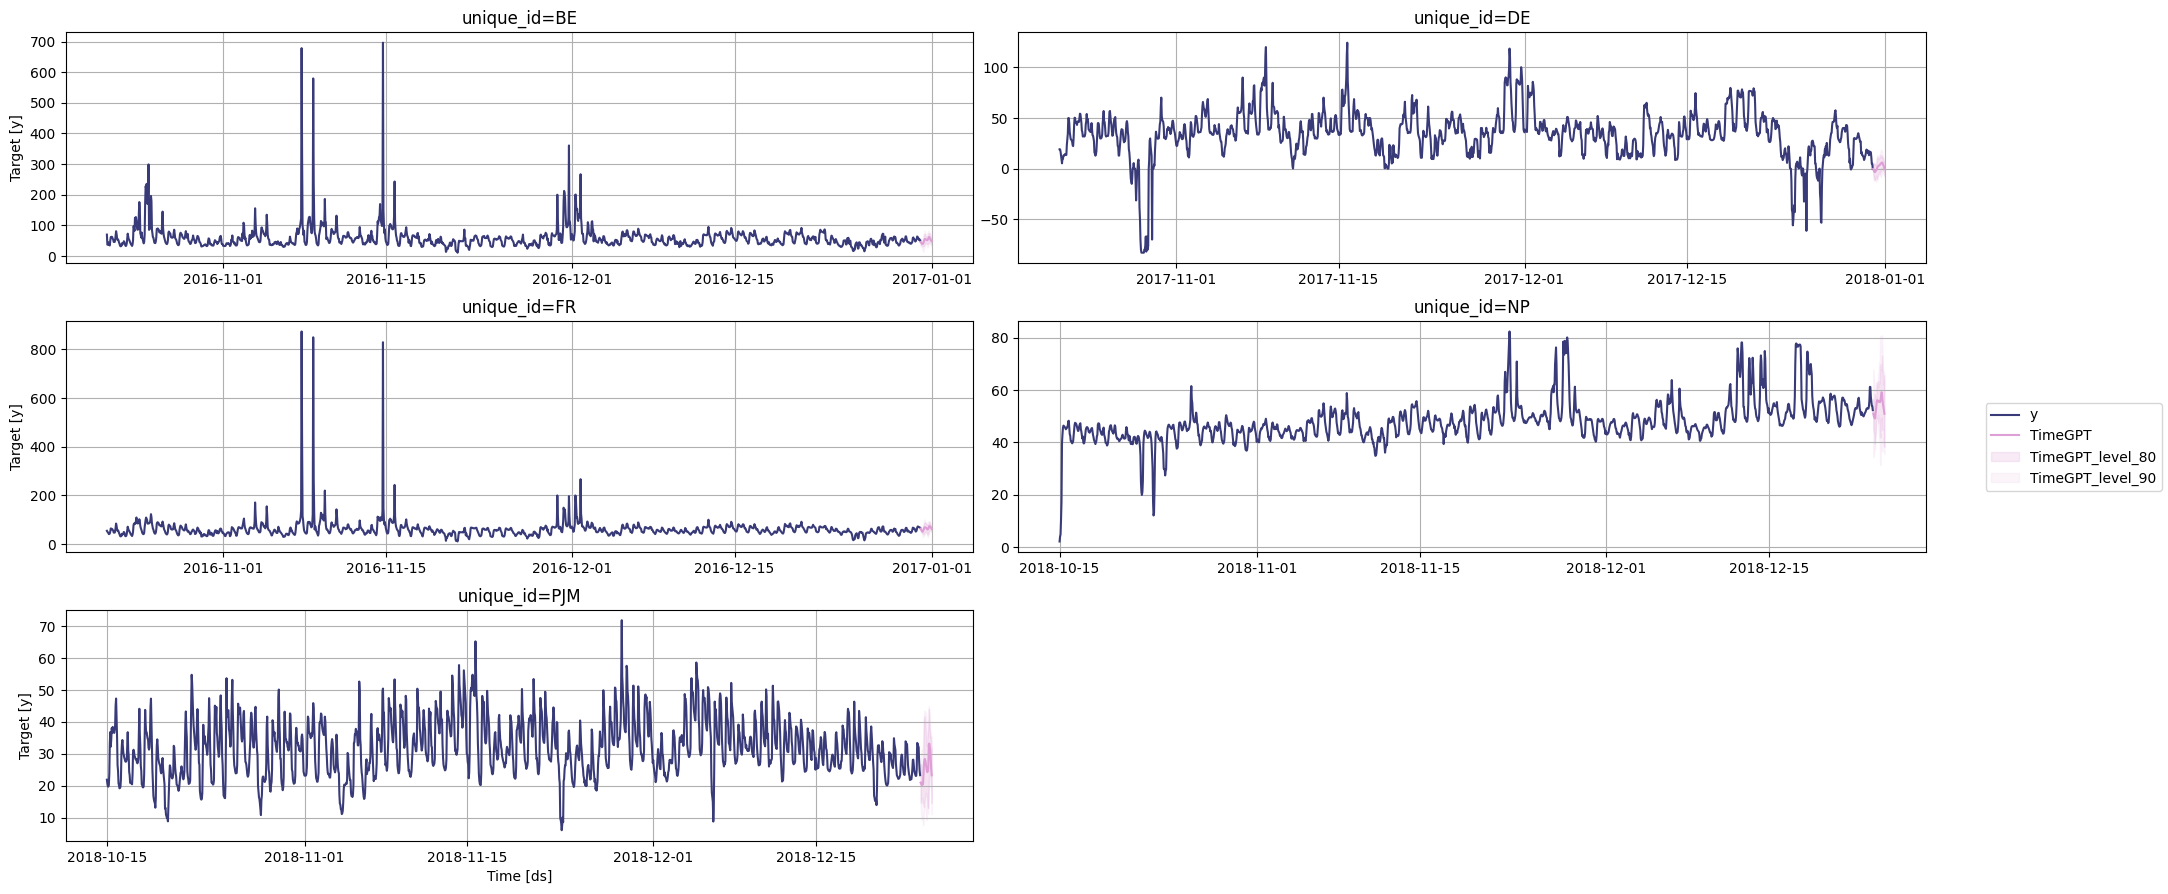

In [7]:
import pandas as pd
from nixtla import NixtlaClient

import key


# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = key.NIXTLA_API_KEY)

# 2. Read historic electricity demand data 
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')

# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(df, h=24, level=[80, 90])

# 4. Plot your results (optional)
nixtla_client.plot(df, fcst_df, time_col='ds', target_col='y', level=[80, 90])


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
d:\Working Folder\Development\nixtla\nixtla_venv\lib\site-packages\utilsforecast\preprocessing.py:126: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


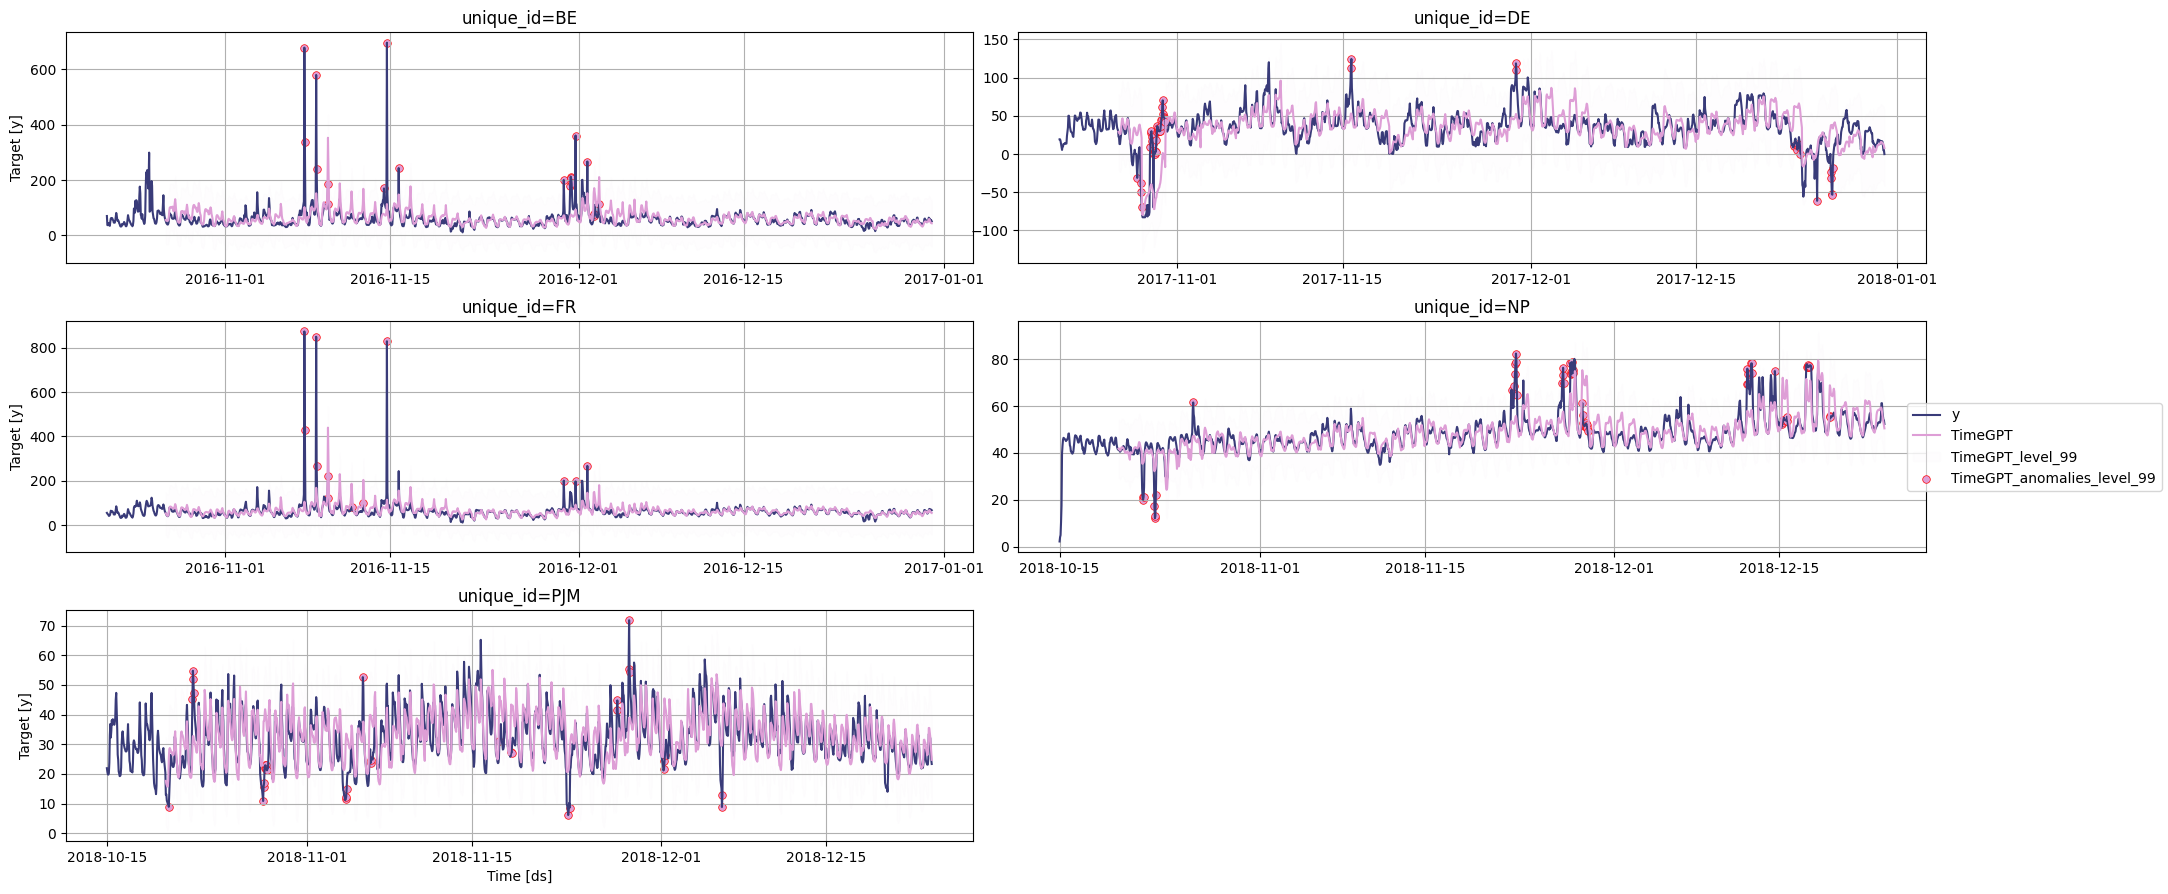

In [9]:
# 3. Detect Anomalies 
anomalies_df = nixtla_client.detect_anomalies(df, time_col='ds', target_col='y', freq='H')

# 4. Plot your results (optional)
nixtla_client.plot(df, anomalies_df,time_col='ds', target_col='y')

In [10]:
# another data
df1 = pd.read_csv("../datasets/usdjpy_020120_300524.csv")
df1

,datetime,open,high,low,close,tick_volume,volume,spread
0,2020-01-02 00:00:00,108.705,108.842,108.692,108.837,6673,0,3
1,2020-01-02 12:00:00,108.837,108.864,108.210,108.566,17968,0,3
2,2020-01-03 00:00:00,108.555,108.627,107.914,108.066,25280,0,3
3,2020-01-03 12:00:00,108.066,108.265,107.839,108.101,28552,0,3
4,2020-01-06 00:00:00,107.884,108.175,107.769,107.983,25865,0,3
...,...,...,...,...,...,...,...,...
2289,2024-05-28 00:00:00,156.808,156.954,156.622,156.868,13876,0,0
2290,2024-05-28 12:00:00,156.868,157.198,156.580,157.127,18138,0,0
2291,2024-05-29 00:00:00,157.130,157.404,156.894,157.097,15038,0,0
2292,2024-05-29 12:00:00,157.097,157.708,157.095,157.627,17011,0,0


In [18]:
df1.rename(columns={'datetime':'ds',
                   'open':'y'}, inplace=True)

df1

,ds,y,high,low,close,tick_volume,volume,spread
0,2020-01-02 00:00:00,108.705,108.842,108.692,108.837,6673,0,3
1,2020-01-02 12:00:00,108.837,108.864,108.210,108.566,17968,0,3
2,2020-01-03 00:00:00,108.555,108.627,107.914,108.066,25280,0,3
3,2020-01-03 12:00:00,108.066,108.265,107.839,108.101,28552,0,3
4,2020-01-06 00:00:00,107.884,108.175,107.769,107.983,25865,0,3
...,...,...,...,...,...,...,...,...
2289,2024-05-28 00:00:00,156.808,156.954,156.622,156.868,13876,0,0
2290,2024-05-28 12:00:00,156.868,157.198,156.580,157.127,18138,0,0
2291,2024-05-29 00:00:00,157.130,157.404,156.894,157.097,15038,0,0
2292,2024-05-29 12:00:00,157.097,157.708,157.095,157.627,17011,0,0


In [22]:
# 3. Forecast the next 24 hours
fcst_df1 = nixtla_client.forecast(df1, h=24, level=[80, 90])
fcst_df1
# 4. Plot your results (optional)
# nixtla_client.plot(df1, fcst_df1, time_col='datetime', target_col='open', level=[80, 90])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...


Exception: Could not infer frequency of ds column. This could be due to inconsistent intervals. Please check your data for missing, duplicated or irregular timestamps